In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sqrf

import sccellfie
import glasbey

In [2]:
import mpl_fontkit as fk
fk.install("Lato")
fk.set_font("Lato")

Font name: `Lato`


In [3]:
human_db = sccellfie.datasets.load_sccellfie_database(organism='human')

In [4]:
mouse_db = sccellfie.datasets.load_sccellfie_database(organism='mouse')

In [5]:
human_df = human_db['task_info'].drop(columns=['Subsystem']).drop_duplicates().groupby('System').count()
human_df.index = [idx.capitalize() if idx.isupper() else idx for idx in human_df.index]
#human_df.index = [idx.upper() for idx in human_df.index]
human_df

,Task
Amino acids metabolism,77
Carbohydrates metabolism,35
Energy metabolism,8
Glycan metabolism,10
Hormones metabolism,7
Lipids metabolism,38
Nucleotide metabolism,17
Processing in the ER,5
Processing in the Golgi,6
Proteostasis,3


In [6]:
mouse_df = mouse_db['task_info'].drop(columns=['Subsystem']).drop_duplicates().groupby('System').count()
mouse_df.index = [idx.capitalize() if idx.isupper() else idx for idx in mouse_df.index]
#mouse_df.index = [idx.upper() for idx in mouse_df.index]
mouse_df

,Task
Amino acids metabolism,68
Carbohydrates metabolism,34
Energy metabolism,7
Glycan metabolism,9
Hormones metabolism,7
Lipids metabolism,36
Nucleotide metabolism,17
Processing in the ER,5
Processing in the Golgi,6
Proteostasis,3


/tmp/ipykernel_13636/1751137315.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Human Metabolic Tasks (N={df.sum()[0]})', fontsize=24, fontweight='bold')


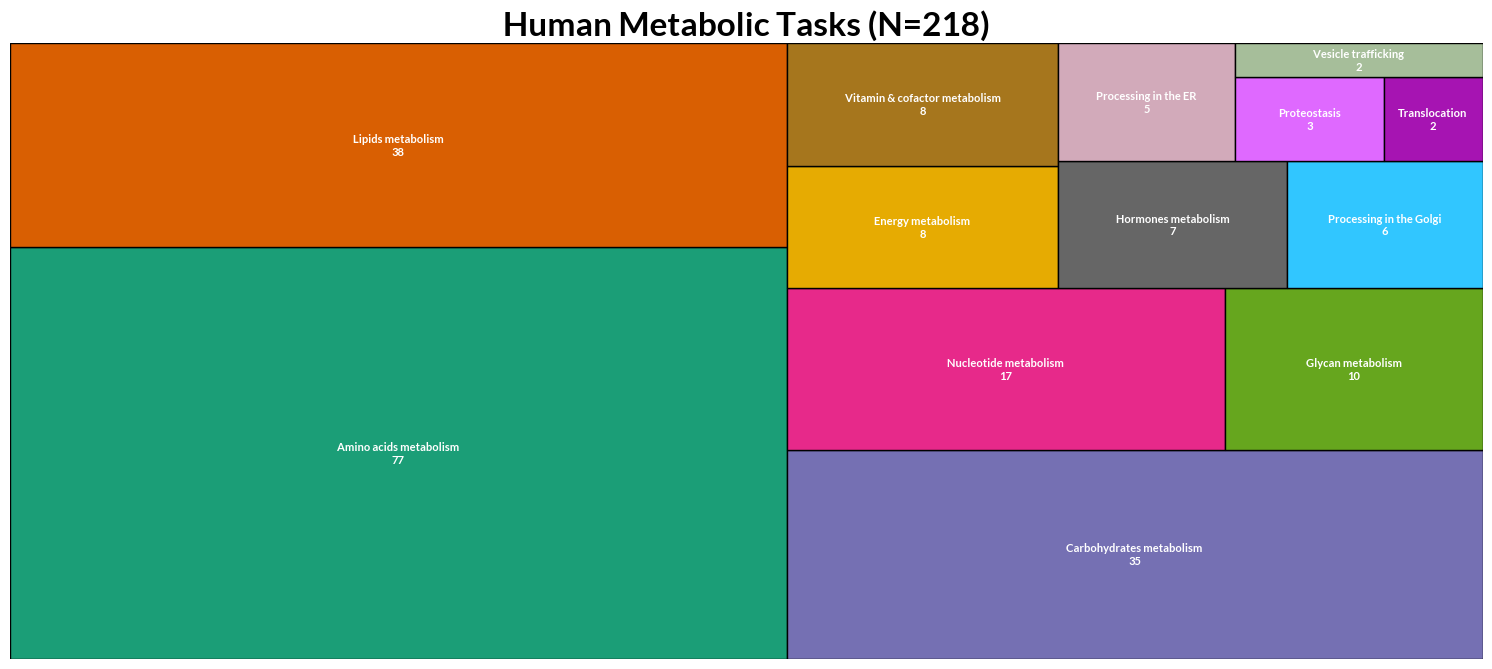

In [7]:
df = human_df.sort_values(by='Task', ascending=False)
labels = [f'{group}\n{task}' for group, task in zip(df.index, df['Task'])]
palette = glasbey.extend_palette('Dark2', palette_size=len(df.index))

plt.figure(figsize=(19,8))
sqrf.plot(sizes=df['Task'],
          label=labels ,text_kwargs={'color': 'white','fontweight': 'bold', 'fontsize':8.0},
          ec= 'black',
          color=palette,
          #pad = 0.005
         )
plt.title(f'Human Metabolic Tasks (N={df.sum()[0]})', fontsize=24, fontweight='bold')
plt.axis('off')
plt.savefig('Human-Task-Number.pdf', dpi=300, bbox_inches='tight')

/tmp/ipykernel_13636/2527858403.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Mouse Metabolic Tasks (N={df.sum()[0]})', fontsize=24, fontweight='bold')


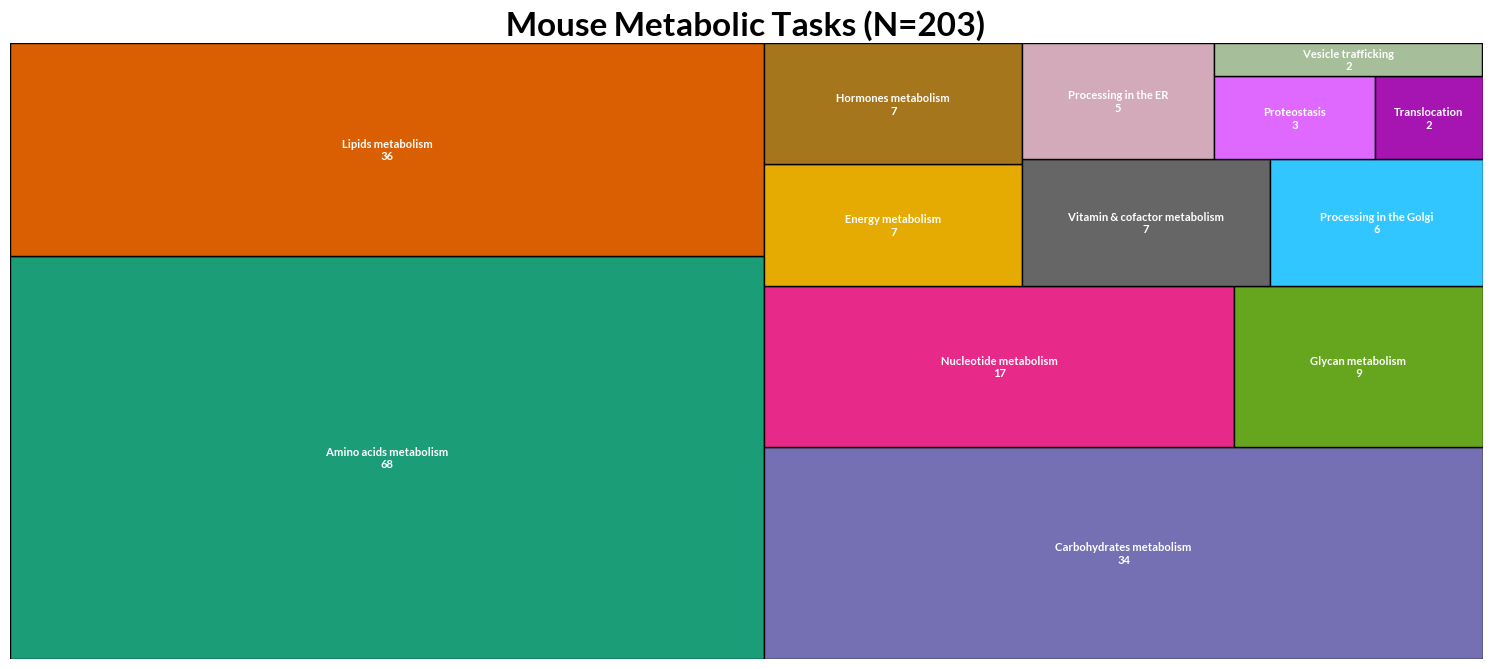

In [8]:
df = mouse_df.sort_values(by='Task', ascending=False)
labels = [f'{group}\n{task}' for group, task in zip(df.index, df['Task'])]
palette = glasbey.extend_palette('Dark2', palette_size=len(df.index))

plt.figure(figsize=(19,8))
sqrf.plot(sizes=df['Task'],
          label=labels ,text_kwargs={'color': 'white','fontweight': 'bold', 'fontsize':8.0},
          ec= 'black',
          color=palette,
          #pad = 0.005
         )
plt.title(f'Mouse Metabolic Tasks (N={df.sum()[0]})', fontsize=24, fontweight='bold')
plt.axis('off')
plt.savefig('Mouse-Task-Number.pdf', dpi=300, bbox_inches='tight')

In [9]:
human_db['rxn_by_gene'].shape

(787, 931)

In [10]:
mouse_db['rxn_by_gene'].shape

(696, 842)

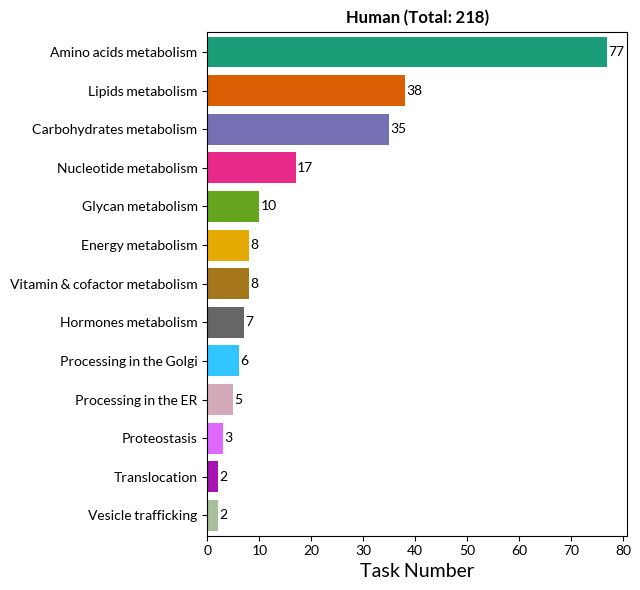

In [11]:
import matplotlib.pyplot as plt
import numpy as np

df = human_df.sort_values('Task', ascending=False)
# Create color palette (you can modify these colors)
colors = glasbey.extend_palette('Dark2', palette_size=len(df.index))

# Create a color mapping dictionary from index to color
color_dict = dict(zip(df.index, colors))

# Add colors column to first dataframe
df['colors'] = df.index.map(color_dict)

plt.figure(figsize=(6.5, max(6, len(df.index) * 0.4)))

# Plot bars with different colors
bars = plt.barh(df.index, df['Task'], color=df['colors'])

# Add value labels next to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.25,  # Add small offset here for spacing
             bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', 
             va='center',
             ha='left',
             fontsize=10)

# Create more xticks
max_value = df['Task'].max()
plt.xticks(np.arange(0, max_value + 5, 10))  # Creates ticks every 5 units

# Customize the plot
plt.xlabel('Task Number', size=14)
plt.ylabel('')
plt.title('Human (Total: 218)', fontdict={'fontweight': 'bold'})
plt.gca().invert_yaxis()

# Reduce the margins to make spacing consistent
plt.margins(y=0.01)

# Adjust layout
plt.tight_layout()

plt.savefig('Human-Tasks.pdf', dpi=300, bbox_inches='tight')

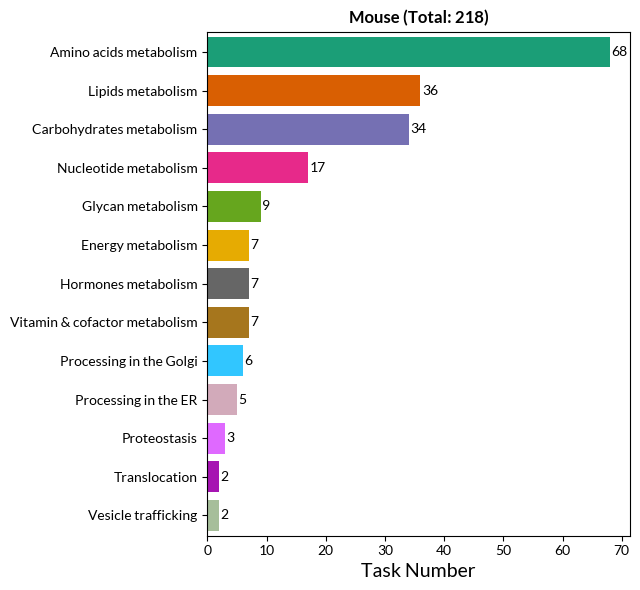

In [12]:
import matplotlib.pyplot as plt
import numpy as np

df = mouse_df.copy()
df['colors'] = df.index.map(color_dict)
df = df.sort_values('Task', ascending=False)


plt.figure(figsize=(6.5, max(6, len(df.index) * 0.4)))

# Plot bars with different colors
bars = plt.barh(df.index, df['Task'], color=df['colors'])

# Add value labels next to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.25,  # Add small offset here for spacing
             bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', 
             va='center',
             ha='left',
             fontsize=10)

# Create more xticks
max_value = df['Task'].max()
plt.xticks(np.arange(0, max_value + 5, 10))  # Creates ticks every 5 units
#plt.ylim(-1, df.shape[0]-0.25)

# Customize the plot
plt.xlabel('Task Number', size=14)
plt.ylabel('')
plt.title('Mouse (Total: 218)', fontdict={'fontweight': 'bold'})
plt.gca().invert_yaxis()

# Reduce the margins to make spacing consistent
plt.margins(y=0.01)

# Adjust layout
plt.tight_layout()

plt.savefig('Mouse-Tasks.pdf', dpi=300, bbox_inches='tight')

/tmp/ipykernel_13636/2964584097.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


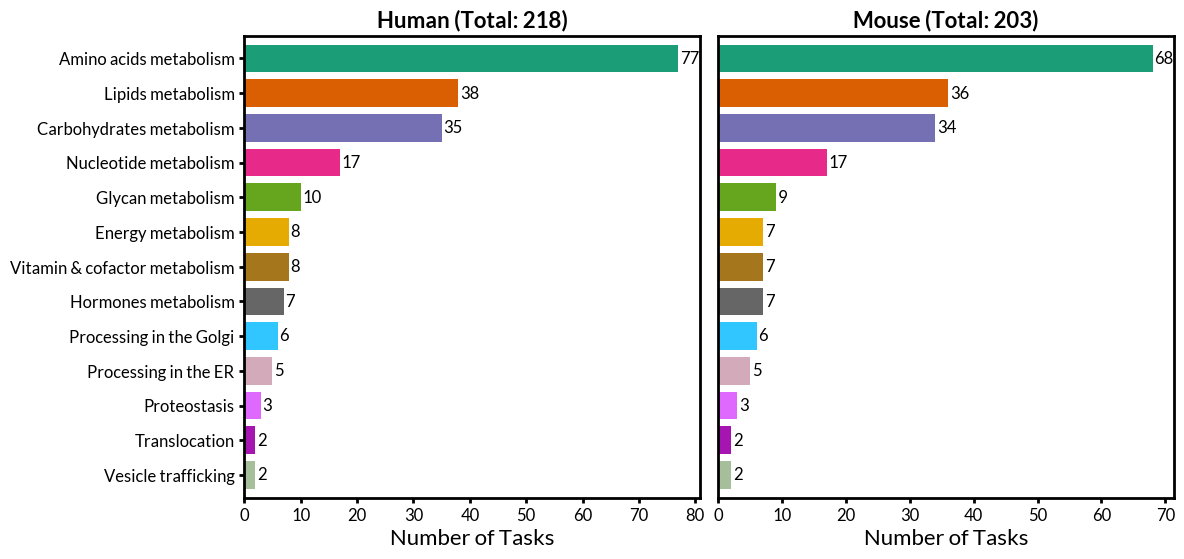

In [13]:
import matplotlib.pyplot as plt
import numpy as np


spine_width = 2
tick_width = 2

# Sort and prepare data
human_df = human_df.sort_values('Task', ascending=False)
colors = glasbey.extend_palette('Dark2', palette_size=len(human_df.index))
color_dict = dict(zip(human_df.index, colors))

# Add colors to both dataframes
human_df['colors'] = human_df.index.map(color_dict)
mouse_df['colors'] = mouse_df.index.map(color_dict)
mouse_df = mouse_df.sort_values('Task', ascending=False)
N_human = human_df['Task'].sum()
N_mouse = mouse_df['Task'].sum()

# Create figure with two subplots sharing y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, max(6, len(human_df.index) * 0.4)), gridspec_kw={'wspace': 0.04})

# First subplot (Human)
bars1 = ax1.barh(human_df.index, human_df['Task'], color=human_df['colors'])
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 0.25,
             bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', 
             va='center',
             ha='left',
             fontsize=12)
ax1.set_xlabel('Number of Tasks', size=16)
ax1.set_title(f'Human (Total: {N_human})', fontdict={'fontweight': 'bold'}, fontsize=16)
ax1.set_xticks(np.arange(0, human_df['Task'].max() + 5, 10))
ax1.margins(y=0.02)
ax1.invert_yaxis()

# Second subplot (Mouse)
bars2 = ax2.barh(mouse_df.index, mouse_df['Task'], color=mouse_df['colors'])
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 0.25,
             bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', 
             va='center',
             ha='left',
             fontsize=12)
ax2.set_xlabel('Number of Tasks', size=16)
ax2.set_title(f'Mouse (Total: {N_mouse})', fontdict={'fontweight': 'bold'}, fontsize=16)
ax2.set_xticks(np.arange(0, mouse_df['Task'].max() + 5, 10))
ax2.margins(y=0.02)

# Remove yticks and lines from second plot
ax2.tick_params(axis='y', length=0)


ax1.tick_params(axis='both', labelsize=12, width=tick_width)
ax2.tick_params(axis='both', labelsize=12, width=tick_width,)

for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(spine_width)

# Adjust layout and save
plt.tight_layout()
plt.savefig('Combined-Tasks.pdf', dpi=300, bbox_inches='tight')

In [79]:
plt.rcParams['pdf.fonttype'] = 42  # This ensures TrueType fonts are used
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']  # or try with 'Helvetica'